In [28]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # turn off automatic numpy parallelization

import numpy as np
import emcee
import corner
import time
from astropy import constants as const
from astropy import units as u
from multiprocessing import Pool
from multiprocessing import cpu_count
from matplotlib import pyplot as plt

ncpu = cpu_count()
print("{0} CPUs".format(ncpu))

from load_mcxc_data import load_clusters
from statistics_functions import log_lik_eq



8 CPUs


In [2]:
clusters, variances=load_clusters(nrows=10)

In [15]:
T_data = [c.baryon_temp for c in clusters]

In [10]:
log_mp = np.log10(const.m_p.to(u.GeV, equivalencies=u.mass_energy()).value)

ndim, nwalkers = 2, 32
p0=np.zeros((nwalkers, ndim ))
log_sigma0 = np.random.uniform(low=-30, high=-15, size=nwalkers).astype(np.float128)
log_mx = np.random.uniform(low=-2, high=log_mp, size=nwalkers).astype(np.float128)
p0[:,0]=log_sigma0
p0[:,1]=log_mx
p0

array([[-26.30806439,  -0.4354374 ],
       [-25.45730139,  -1.34639955],
       [-23.03470376,  -0.79825114],
       [-23.37915421,  -0.69119905],
       [-29.69892948,  -0.21776499],
       [-21.5645749 ,  -1.86203227],
       [-22.55570065,  -1.34210191],
       [-24.94896585,  -1.98043966],
       [-29.48006589,  -1.65527864],
       [-27.66951303,  -0.48270414],
       [-21.94736499,  -0.22143425],
       [-18.04130256,  -0.46954678],
       [-22.19700793,  -0.68221726],
       [-27.99528031,  -0.22415353],
       [-15.57898028,  -0.06338406],
       [-20.16385247,  -0.79814053],
       [-17.10743994,  -1.61968641],
       [-26.76448769,  -1.97697344],
       [-28.3914699 ,  -0.26375056],
       [-23.74659085,  -0.18322319],
       [-16.16130096,  -0.59789705],
       [-23.20286451,  -0.7965666 ],
       [-24.85009822,  -1.37438102],
       [-25.7604312 ,  -0.2030572 ],
       [-25.00239743,  -0.72848583],
       [-15.46872154,  -1.99102577],
       [-29.25303925,  -0.7676126 ],
 

In [16]:
# serial
nsteps=100
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_lik_eq, args=[T_data, variances, clusters])
start=time.time()
sampler.run_mcmc(p0, nsteps, progress=True)
end = time.time()
serial_time = end - start
print("Serial took {0:.1f} seconds".format(serial_time))

100%|█████████████████████████████████████████| 100/100 [12:06<00:00,  7.27s/it]

Serial took 734.8 seconds


In [17]:
with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_lik_eq, pool=pool, args=[T_data, variances, clusters])
    start = time.time()
    sampler.run_mcmc(p0, nsteps, progress=True)
    end = time.time()
    multi_time = end - start
    print("Multiprocessing took {0:.1f} seconds".format(multi_time))
    print("{0:.1f} times faster than serial".format(serial_time / multi_time))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


100%|█████████████████████████████████████████| 100/100 [04:00<00:00,  2.40s/it]

Multiprocessing took 246.2 seconds
3.0 times faster than serial


In [34]:
nsteps=10000

with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_lik_eq, pool=pool, args=[T_data, variances, clusters])
    sampler.run_mcmc(p0, nsteps, progress=True)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


  0%|                                       | 6/10000 [00:12<5:47:04,  2.08s/it]Process SpawnPoolWorker-30:
Process SpawnPoolWorker-25:
Process SpawnPoolWorker-28:
Process SpawnPoolWorker-32:

Process SpawnPoolWorker-26:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/multiprocessing/synchronize.py",

KeyboardInterrupt: 

In [35]:
nsteps_additional=5000
pool.close()
pool.join()
with Pool() as pool:
    sampler.run_mcmc(None, nsteps_additional, progress=True)

ValueError: Cannot have `initial_state=None` if run_mcmc has never been called.

In [20]:
print(
    "Mean autocorrelation time: {0:.3f} steps".format(
        np.mean(sampler.get_autocorr_time())
    )
)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [236.43182327 150.90340661]

In [21]:
"Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction))

'Mean acceptance fraction: 0.482'

(320000, 2)


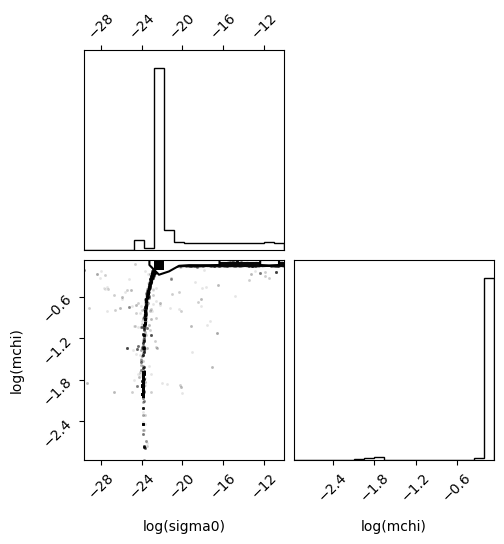

In [22]:
flat_samples = sampler.get_chain(flat=True) #discard=
print(flat_samples.shape)
fig = corner.corner(flat_samples, labels=['log(sigma0)', 'log(mchi)'], top_ticks=True)

In [25]:
np.median(flat_samples[:,0])

-22.1824132313931

In [26]:
np.median(flat_samples[:,1])

-0.15018916874274568

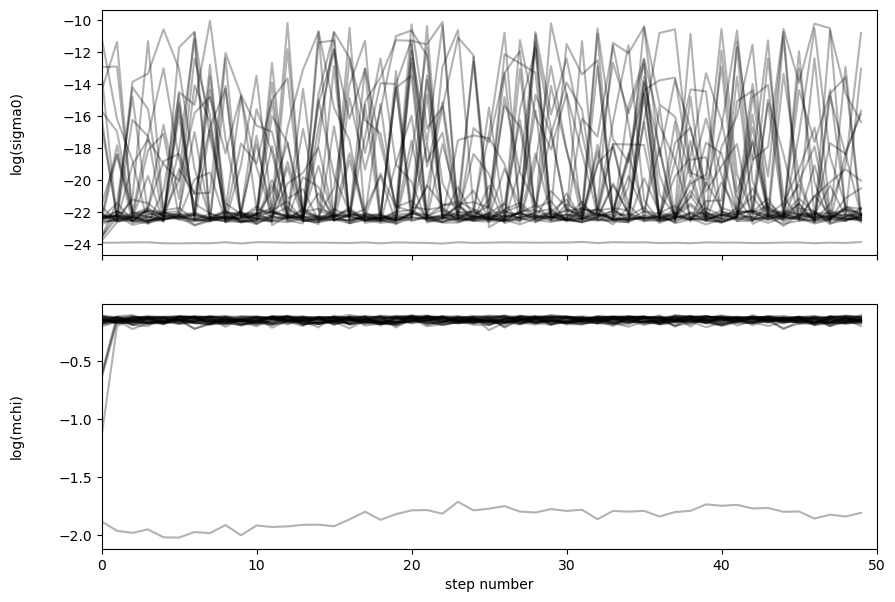

In [32]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain(thin=200)
labels = ['log(sigma0)', 'log(mchi)']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");